# 3. Vectors and Matrices: Exercise

Name: Kenji Doya

Date: Oct. 7, 2022

$$ % Latex macros
\newcommand{\mat}[1]{\begin{pmatrix} #1 \end{pmatrix}}
\newcommand{\p}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\b}[1]{\boldsymbol{#1}}
\newcommand{\w}{\boldsymbol{w}}
\newcommand{\x}{\boldsymbol{x}}
\newcommand{\y}{\boldsymbol{y}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Determinant and eigenvalues
1) For a 2x2 matrix
$A = \left(\begin{array}{cc} a & b\\ c & d \end{array}\right)$,
let us verify that $\det A = ad - bc$ in the case graphically shown below ($a, b, c, d$ are positive).

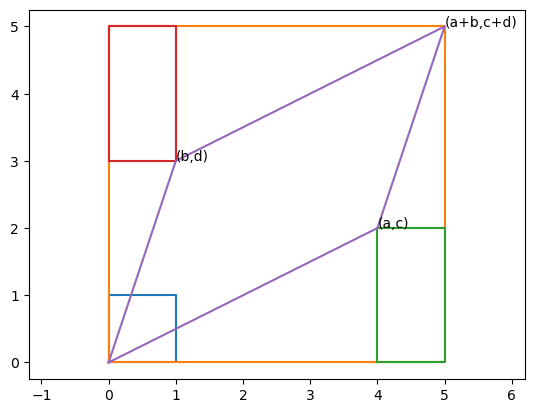

In [2]:
A = np.array([[4, 1], [2, 3]])
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0])
plt.plot([0, A[0,0]+A[0,1], A[0,0]+A[0,1], 0, 0], 
         [0, 0, A[1,0]+A[1,1], A[1,0]+A[1,1], 0])
plt.plot([A[0,0], A[0,0]+A[0,1], A[0,0]+A[0,1], A[0,0], A[0,0]], 
         [0, 0, A[1,0], A[1,0], 0])
plt.plot([0, A[0,1], A[0,1], 0, 0], 
         [A[1,1], A[1,1], A[1,0]+A[1,1], A[1,0]+A[1,1], A[1,1]])
plt.plot([0, A[0,0], A[0,0]+A[0,1], A[0,1], 0], 
         [0, A[1,0], A[1,0]+A[1,1], A[1,1], 0])
plt.axis('equal')
plt.text(A[0,0], A[1,0], '(a,c)')
plt.text(A[0,1], A[1,1], '(b,d)')
plt.text(A[0,0]+A[0,1], A[1,0]+A[1,1], '(a+b,c+d)');

A unit square is transformed into a parallelogram. Its area $S$ can be derived as follows:  
Large rectangle: $ S_1 = (a+b)(c+d) = ac+ad+bc+bd $  
Small rectangle: $ S_2 = bc $  
Bottom/top triangle: $ S_3 = ac/2 $  
Left/right triangle: $ S_4 = bd/2 $  
Parallelogram: 
$$ S = S_1 - 2S_2 - 2S_3 - 2S_4 = ad - bc$$ 

2) The determinant equals the product of all eigenvalues. Verify this numerically for multiple cases and explain intuitively why that should hold.

In [3]:
#A = np.array([[1, 2], [3, 4]])
m = 4
A = np.random.randn(m,m)
print(A)
lam, V = np.linalg.eig(A)
print('eigenvalues = ', lam)
print('product = ', np.product(lam))
det = np.linalg.det(A)
print('detrminant = ', det)

[[ 1.22355681 -0.97534275 -0.09651617  0.39189615]
 [ 1.56005257  1.49860169  0.36769975 -0.99596733]
 [ 0.4036962  -0.29473852  0.84560701  1.6121484 ]
 [-0.8479092   0.31927001  0.0248646  -0.45297922]]
eigenvalues =  [ 1.25820124+1.4294587j  1.25820124-1.4294587j -0.35136323+0.j
  0.94974704+0.j       ]
product =  (-1.2101596380934625+0j)
detrminant =  -1.2101596380934625


The determinant represents how much the volume in the original space is expanded or shrunk.

The eigenvalues represent how much a segment in the direction of eigen vector is scaled in length.

Therefore, the producs of all eigenvalues should equal to the determinant.

## 2) Eigenvalues and matrix product
1) Make a random (or hand-designed) $m\times m$ matrix $A$. Compute its eigenvalues and eigenvectors. From a random (or your preferred) initial point $\b{x}$, compute $A\b{x}, A^2\b{x}, A^3\b{x},...$ and visualize the points. Then characterize the behavior of the points with respect the eigenvalues and eigenvectors.

In [4]:
m = 4
A = np.random.randn(m,m)
print('A = ', A)
L, V = np.linalg.eig(A)
print('eigenvalues = ', L)
#print('eigenvectors =\n', V)

A =  [[ 0.39468381  0.26180337 -1.3454211   0.53843599]
 [-0.16574714 -1.37364729 -2.51860988  1.19213452]
 [ 2.38039978 -1.81169519 -0.79859693 -0.68554787]
 [ 0.79388221 -0.16889463  1.21437379  0.67235698]]
eigenvalues =  [-3.04482565+0.j          0.36265442+1.79652674j  0.36265442-1.79652674j
  1.21431337+0.j        ]


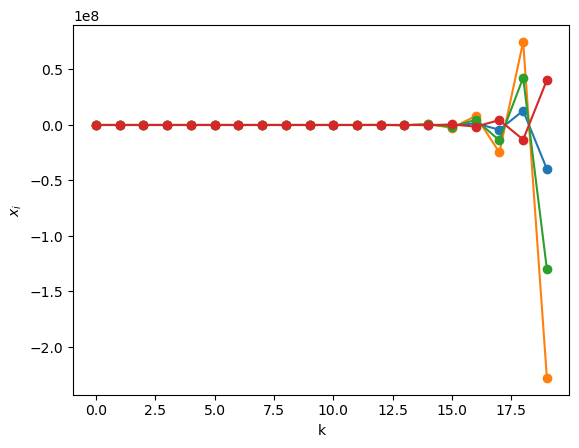

In [5]:
# take a point and see how it moves
K = 20  # steps
x = np.zeros((m, K))
x[:,0] = np.random.randn(m) # random initial state
for k in range(K-1):
    x[:,k+1] = A @ x[:,k]  # x_{k+1} = A x_k
# plot the trajectory
plt.plot( x.T, 'o-')
plt.xlabel("k"); plt.ylabel("$x_i$");

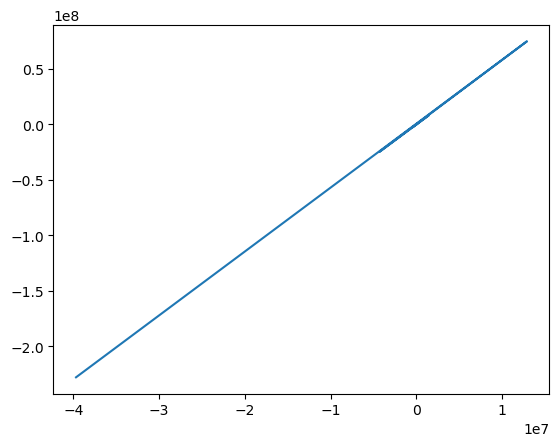

In [6]:
plt.plot( x[0,:], x[1,:])

2) Do the above with several different matrices

A =  [[ 2.33930831  1.02776307 -0.26864813  0.41056369]
 [-0.79827323  0.5107841  -0.214824    0.81591303]
 [-0.76172594 -0.47851687  0.54927075 -0.34102945]
 [ 1.792733   -1.20986342 -1.08387072  1.17950373]]
eigenvalues =  [3.05415094+0.j         0.57311623+1.32113341j 0.57311623-1.32113341j
 0.37848348+0.j        ]


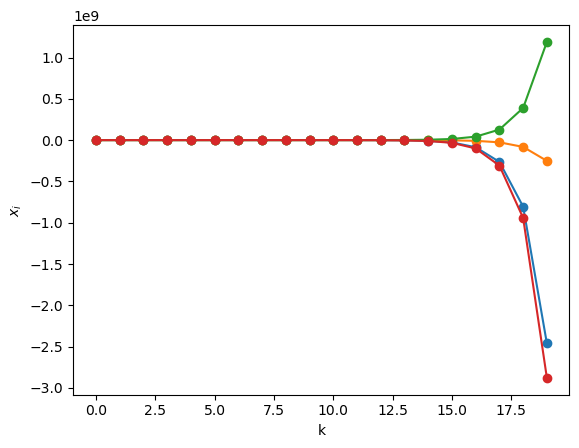

In [7]:
A = np.random.randn(m,m)
print('A = ', A)
L, V = np.linalg.eig(A)
print('eigenvalues = ', L)
for k in range(K-1):
    x[:,k+1] = A @ x[:,k]  # x_{k+1} = A x_k
# plot the trajectory
plt.plot( x.T, 'o-')
plt.xlabel("k"); plt.ylabel("$x_i$");

## 3) Principal component analysis
Read in the "digits" dataset, originally from `sklearn`.

In [8]:
data = np.loadtxt("data/digits_data.txt")
target = np.loadtxt("data/digits_target.txt", dtype='int64')
m, n = data.shape
print(m, n)

1797 64


The first ten samples look like these:

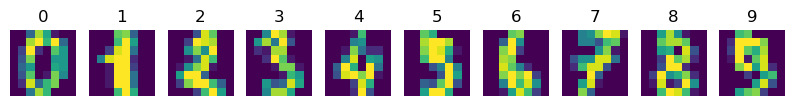

In [9]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(data[i].reshape((8,8)))
    plt.title(target[i])
    plt.axis('off')

1) Compute the principal component vectors from all the digits and plot the eigenvalues from the largest to smallest.

L, V =  [1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00] [[ 0.          

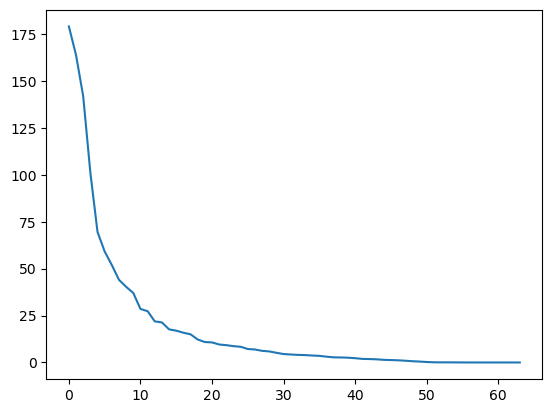

In [10]:
# subtract the mean
Xm = np.mean(data, axis=0)
X = data - Xm
#C = np.cov(X, rowvar=False)
C = (X.T @ X)/(m-1)
lam, V = np.linalg.eig(C)
# columns of V are eigenvectors
# it is not guaranteed that the eigenvalues are sorted, so sort them
ind = np.argsort(-lam)  # indices for sorting, descending order
L = lam[ind]
V = V[:,ind]
print('L, V = ', L, V)
plt.plot(L);

L, Vt =  [1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.14286697e-30 1.14286697e-30 1.12542605e-30] [[ 1.77484909e

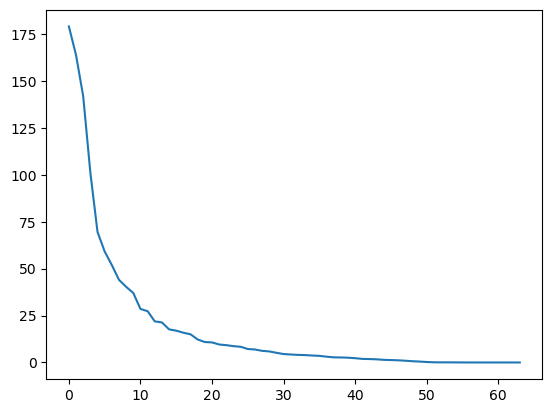

In [11]:
# use SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)
# columns of V, or rows of Vt are eigenvectors
L = S**2/(m-1)  # eigenvalues
print('L, Vt = ', L, Vt)
plt.plot(L);

2) Visualize the principal vectors as images.

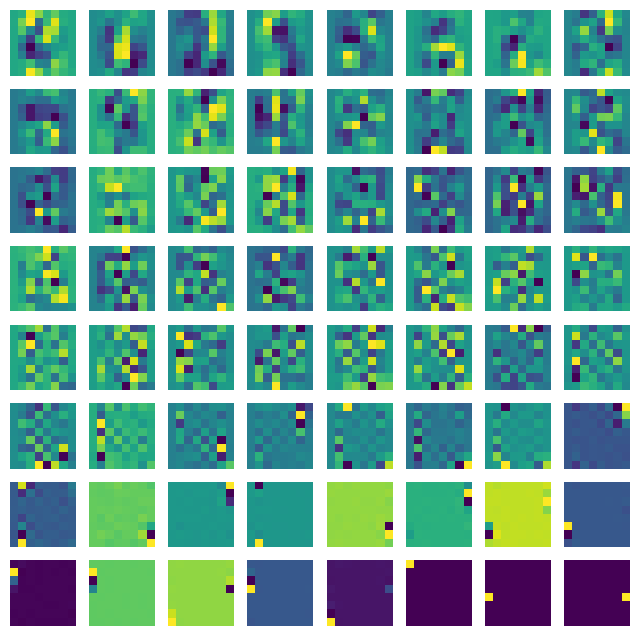

In [12]:
plt.figure(figsize=(8,8))
for i in range(n):
    plt.subplot(8,8,i+1)
    plt.imshow(V[:,i].reshape((8,8)))
    #plt.imshow(Vt[i].reshape((8,8)))
    plt.axis('off')

3) Scatterplot the digits in the first two or three principal component space, with different colors/markers for digits.

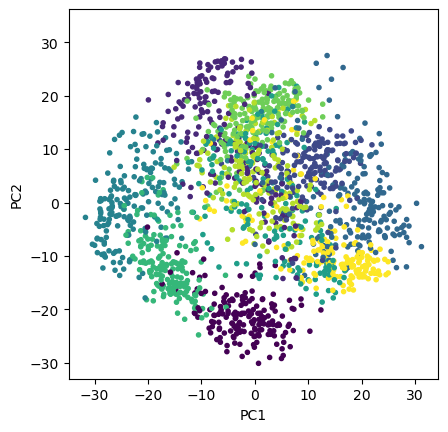

In [13]:
# columns of V are eigenvectors
Z = X @ V
plt.scatter(Z[:,0], Z[:,1], c=target, marker='.')
plt.setp(plt.gca(), xlabel='PC1', ylabel='PC2')
plt.axis('square');

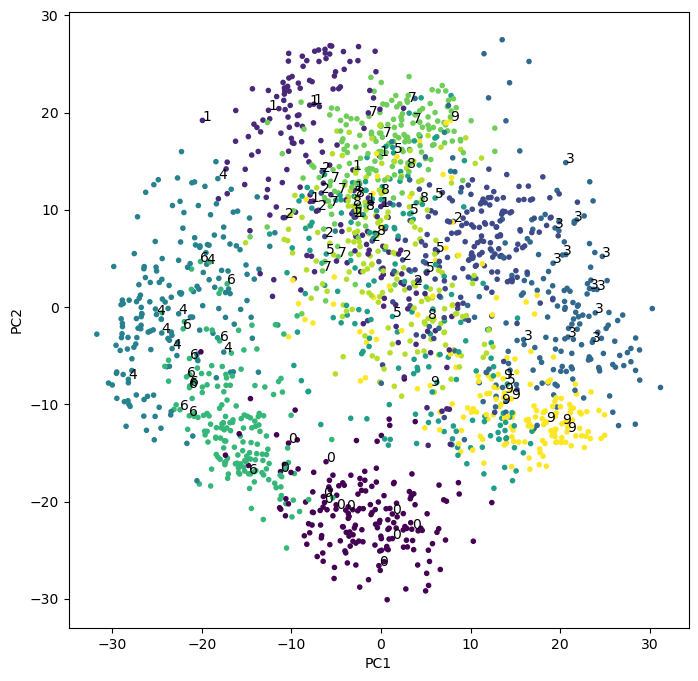

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(Z[:,0], Z[:,1], c=target, marker='.')
# add labels to some points
for i in range(100):
    plt.text(Z[i,0], Z[i,1], str(target[i]))
plt.setp(plt.gca(), xlabel='PC1', ylabel='PC2');

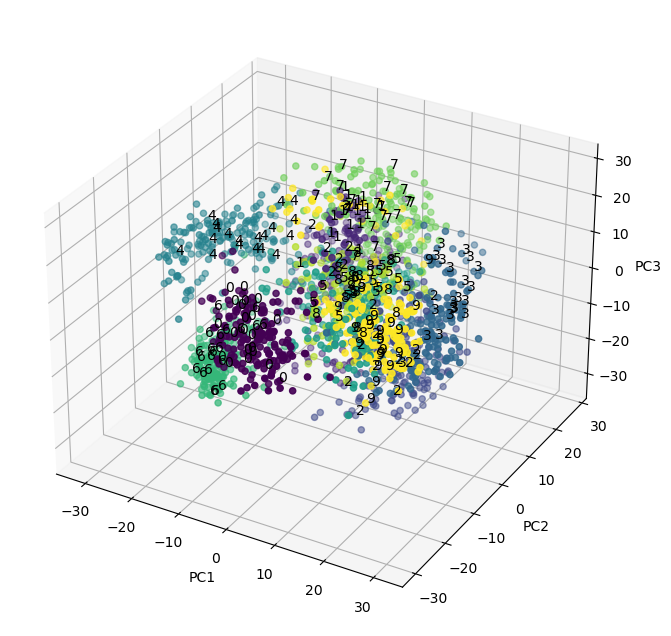

In [15]:
# In 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=target, marker='o')
# add labels to some points
for i in range(200):
    ax.text(Z[i,0], Z[i,1], Z[i,2], str(target[i]))
plt.setp(plt.gca(), xlabel='PC1', ylabel='PC2', zlabel='PC3');

4) Take a sample digit, decompose it into principal components, and reconstruct the digit from the first $m$ components. See how the quality of reproduction depends on $m$.

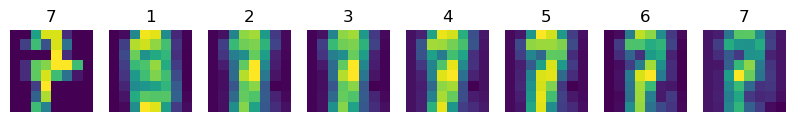

In [16]:
K = 8  # PCs to be considered
i = np.random.randint(m) # pick a random sample
plt.figure(figsize=(10,4))
plt.subplot(1,K,1)
plt.imshow(data[i].reshape((8,8))) # original
plt.title(target[i])
plt.axis('off')
for k in range(1,K):  # number of PCs
    Xrec = Xm + V[:,:k] @ Z[i,:k] 
    plt.subplot(1,K,k+1)
    plt.imshow(Xrec.reshape((8,8))) # reconstructed
    plt.title(k)
    plt.axis('off')